#### Context: 
In this scenario, I am  a junior data analyst working for the marketing analyst team at Bellabeat, a high-tech manufacturer of health-focused products for women. Bellabeat is a successful small company, but they have the potential to become a larger player in the
global smart device market. Urška Sršen, cofounder and Chief Creative Officer of Bellabeat, believes that analyzing smart device fitness data could help unlock new growth opportunities for the company.

# Businesss Task:
I have been asked to focus on one of Bellabeat’s products and analyze smart device data to gain insight into how consumers are using their smart devices.

# Goal:
The insights will then helps us to guide the marketing strategy for the company.

# Product chosen:
The Bellabeat app provides users with health data related to their **activity**, **sleep**, **stress**,**menstrual cycle**, and **mindfulness habits**. This data can help users better understand their current habits andmake healthy decisions. The Bellabeat app connects to their line of smart wellness products.

Questions that we are interested in: 
1. What are some trends in smart device usage?
2. How could these trends apply to Bellabeat customers?
3. How could these trends help influence Bellabeat marketing strategy?

In [2]:
import pandas as pd 
import seaborn as sns 
import numpy as np
from matplotlib import pyplot as plt

In [3]:
dailyAct= pd.read_csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv")
dailyAct

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.500000,8.500000,0.0,1.88,0.55,6.06,0.00,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.970000,6.970000,0.0,1.57,0.69,4.71,0.00,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.740000,6.740000,0.0,2.44,0.40,3.91,0.00,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.280000,6.280000,0.0,2.14,1.26,2.83,0.00,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.160000,8.160000,0.0,2.71,0.41,5.04,0.00,36,10,221,773,1863
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935,8877689391,5/8/2016,10686,8.110000,8.110000,0.0,1.08,0.20,6.80,0.00,17,4,245,1174,2847
936,8877689391,5/9/2016,20226,18.250000,18.250000,0.0,11.10,0.80,6.24,0.05,73,19,217,1131,3710
937,8877689391,5/10/2016,10733,8.150000,8.150000,0.0,1.35,0.46,6.28,0.00,18,11,224,1187,2832
938,8877689391,5/11/2016,21420,19.559999,19.559999,0.0,13.22,0.41,5.89,0.00,88,12,213,1127,3832


In [4]:
# how many users are there ?
len(dailyAct["Id"].unique())

33

# **1. Data Cleaning**

# **DataTypes**

In [5]:
dailyAct.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        940 non-null    int64  
 1   ActivityDate              940 non-null    object 
 2   TotalSteps                940 non-null    int64  
 3   TotalDistance             940 non-null    float64
 4   TrackerDistance           940 non-null    float64
 5   LoggedActivitiesDistance  940 non-null    float64
 6   VeryActiveDistance        940 non-null    float64
 7   ModeratelyActiveDistance  940 non-null    float64
 8   LightActiveDistance       940 non-null    float64
 9   SedentaryActiveDistance   940 non-null    float64
 10  VeryActiveMinutes         940 non-null    int64  
 11  FairlyActiveMinutes       940 non-null    int64  
 12  LightlyActiveMinutes      940 non-null    int64  
 13  SedentaryMinutes          940 non-null    int64  
 14  Calories  

In [6]:
"""we clearly see that the date are not in the correct format, it is an object instead of date
let's fix that"""
dailyAct["ActivityDate"] = pd.to_datetime(dailyAct["ActivityDate"])

## **Duplicates values**
We know that there are 33 users whose data have been collected. Now, let's check if there are my duplicates. The columns that we will be interested on here is the Id and the ActivityDate because we suppose that our data are recorded per day and for a single day we should not have more than 1 record of data

In [7]:
tocheck = dailyAct.columns[:2]
dailyAct.duplicated(tocheck,keep="first").value_counts()

False    940
dtype: int64

In [8]:
"""I notice that the column TrackerDistance seems to have the same values as the column TotalDistance.
   Then, let's check if this is true
"""
t,f=0,0
for i,j in zip(dailyAct["TotalDistance"],dailyAct["TrackerDistance"]):
    if i==j: 
        t+=1
    else:
        f+=1
print(f"True {t} , false {f} ")

True 925 , false 15 


##  **NA Values**

In [9]:
dailyAct.isna().sum()

Id                          0
ActivityDate                0
TotalSteps                  0
TotalDistance               0
TrackerDistance             0
LoggedActivitiesDistance    0
VeryActiveDistance          0
ModeratelyActiveDistance    0
LightActiveDistance         0
SedentaryActiveDistance     0
VeryActiveMinutes           0
FairlyActiveMinutes         0
LightlyActiveMinutes        0
SedentaryMinutes            0
Calories                    0
dtype: int64

## **Sorting and Filtring** 

In [10]:
dailyAct.sort_values("ActivityDate", inplace=True)

In [11]:
dailyAct.head(1)

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,2016-04-12,13162,8.5,8.5,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985


# **2. Analyzing**

## **Group by user id**
Because we know that there are 33 individuals users and each row of data represent differents records of a user's activity on a particular day,then, let's group  the data by the  user. This grouping will help us to get a better understanding of each user activity and identify trends and patterns between them.

In [12]:
dailyAct_perUser = dailyAct.groupby("Id")

In [13]:
# how many days of data do we have on average for the users?
dailyAct_perUser["ActivityDate"].count().mean()

28.484848484848484

In [14]:
# Now that we are confident that we have about one month of data for the users, let's see their behaviors for that period
avarage_records = dailyAct_perUser.agg("mean")
avarage_records

,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
Id,,,,,,,,,,,,,
1503960366,12116.741935,7.809677,7.809677,0.000000,2.858387,0.794194,4.152903,0.000000,38.709677,19.161290,219.935484,848.161290,1816.419355
1624580081,5743.903226,3.914839,3.914839,0.000000,0.939355,0.360645,2.606774,0.006129,8.677419,5.806452,153.483871,1257.741935,1483.354839
1644430081,7282.966667,5.295333,5.295333,0.000000,0.730000,0.951000,3.609000,0.004000,9.566667,21.366667,178.466667,1161.866667,2811.300000
1844505072,2580.064516,1.706129,1.706129,0.000000,0.008387,0.049032,1.647419,0.000000,0.129032,1.290323,115.451613,1206.612903,1573.483871
1927972279,916.129032,0.634516,0.634516,0.000000,0.095806,0.031290,0.507097,0.000000,1.322581,0.774194,38.580645,1317.419355,2172.806452
2022484408,11370.645161,8.084193,8.084193,0.000000,2.421613,0.720000,4.942581,0.000000,36.290323,19.354839,257.451613,1112.580645,2509.967742
2026352035,5566.870968,3.454839,3.454839,0.000000,0.006129,0.011290,3.436129,0.000000,0.096774,0.258065,256.645161,689.419355,1540.645161
2320127002,4716.870968,3.187742,3.187742,0.000000,0.106774,0.097742,2.980323,0.000000,1.354839,2.580645,198.193548,1220.096774,1724.161290
2347167796,9519.666667,6.355556,6.355556,0.000000,1.059444,1.075000,4.221667,0.000000,13.500000,20.555556,252.500000,687.166667,2043.444444


## **Visualizing the average Total Steps, Total Distance,Calories and activity for each user**
After grouping our data by user, we calcultated the average of all the parameters measured for each user to get a better view their activity. let's visualize it for easy interpretation.

<AxesSubplot:xlabel='SedentaryMinutes'>

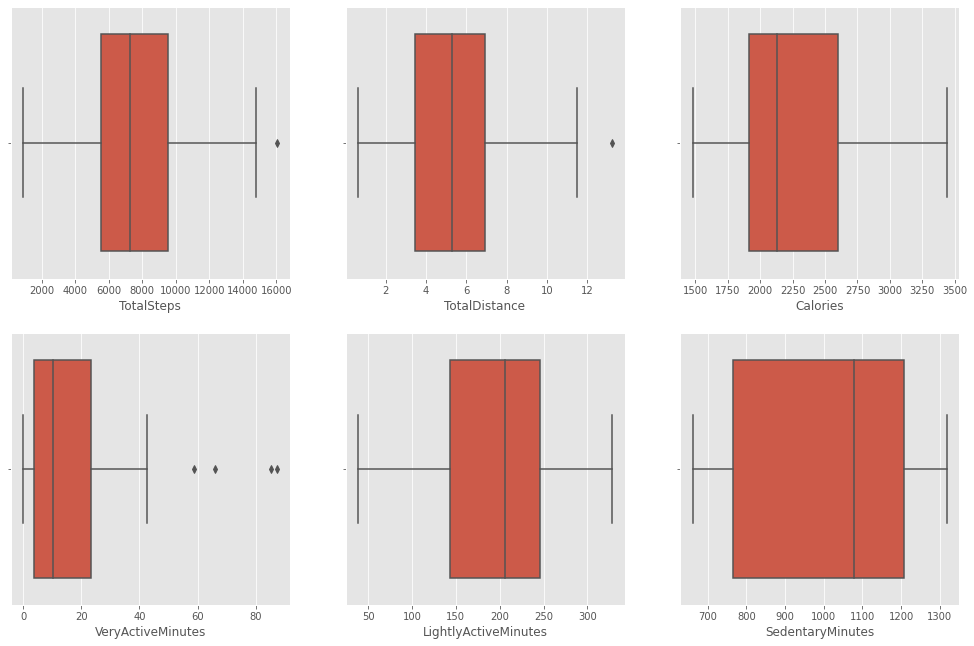

In [15]:
plt.figure(figsize=(17,11))
plt.style.use("ggplot")
plt.subplot(2,3,1)
sns.boxplot(data=avarage_records,x="TotalSteps")
# plt.axvline(10000,0,0.7)
plt.subplot(2,3,2)
sns.boxplot(data=avarage_records,x="TotalDistance")
plt.subplot(2,3,3)
sns.boxplot(data=avarage_records,x="Calories")
plt.subplot(2,3,4)
sns.boxplot(data=avarage_records,x="VeryActiveMinutes")
plt.subplot(2,3,5)
sns.boxplot(data=avarage_records,x="LightlyActiveMinutes")
plt.subplot(2,3,6)
sns.boxplot(data=avarage_records,x="SedentaryMinutes")


These charts represent the average activity of our users. From these charts, we can clearly see that : 
* 75% of the users don't  make the 10.000 Steps recommended and walk less than 8 km a day
* the median amount of time spent on sedentary activities (work, watching television,... )is very large, about 18 hours per day. This implies that most of the people has a sedentary lifestyle. It may be due to their job or simply their own behavior. 
* 75% of the users dedicates less than 30 min of their day in going for a walk, bike, or running 

We have seen from the previous analysis that most of the people among the user tend to have a sedentary lifestyle. Let's inspect closely the sedentary time of the users in order to identify the trends among them and check if all the users behave the same and how much this sedentary time impact others aspect of their daily activity.

<AxesSubplot:xlabel='SedentaryMinutes', ylabel='Count'>

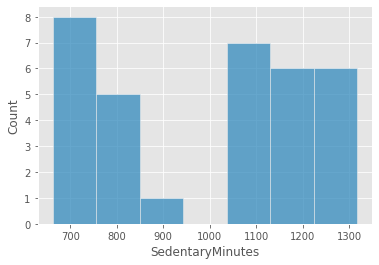

In [16]:
# plt.figure(figsize=(17,11))
sns.histplot(data=avarage_records,x="SedentaryMinutes")

The normal sedentary time recommended is about 8 hours or less with no more than 3 hours of  recreational screen time,  which make a total of 11 hours on a day. From this chart, which represents the sedentary minutes we can see that they are groups of users which can be made  based on how much they spent on their sedentary activities:

* users with lightly sedentary habits, those who are under 800 minutes per day
* users with moderately fairly sedentary habits, those who are between 800 to 1000 minutes 
* users with moderately very sedentary habits, those who are between 800 to 1000 minutes 

Now let's add a column on our dataframe in order to apply this 

In [17]:
# create a new column to UserCategory and set the default value to lightlySedentary
avarage_records["UserCategory"] ="lightlySedentary"

In [18]:
# iterate over the dataframe and assign to each user a specific category base on the rules set above
for i in avarage_records.index:
    if avarage_records.loc[i,"SedentaryMinutes"]<800 :  
        avarage_records.loc[i,"UserCategory"]="lightlySedentary"    
    elif avarage_records.loc[i,"SedentaryMinutes"]>800 and avarage_records.loc[i,"SedentaryMinutes"]<1000:
        avarage_records.loc[i,"UserCategory"]="ModeratelySedentary"
    else:  
        avarage_records.loc[i,"UserCategory"]="VerySedentary"

## **Visualize the incidence of the sedentary time over other aspects of user's activity**

<AxesSubplot:title={'center':'Relationship between the SedentaryMinutes and LightlyActiveMinutes '}, xlabel='SedentaryMinutes', ylabel='LightlyActiveMinutes'>

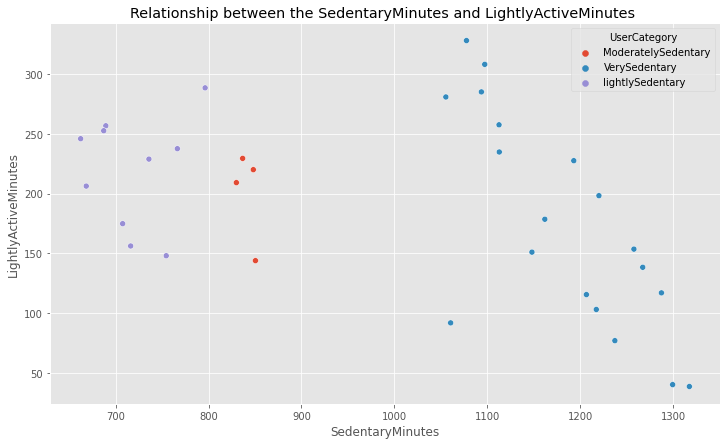

In [39]:
plt.figure(figsize=(12,7))
plt.title("Relationship between the SedentaryMinutes and LightlyActiveMinutes ")
sns.scatterplot(data=avarage_records,x="SedentaryMinutes",y="LightlyActiveMinutes",hue="UserCategory")


- Lightly and fairly sedentary user tend to behave the same when it come to Lightly activities. They all spend about 150 minutes and above.
- Concerning very sedentary user, they are divide into two clusters. Those who spend more than 150 min(most of them) and those who spend less than it.

<AxesSubplot:title={'center':'Relationship between the SedentaryMinutes and FairlyActiveMinutes '}, xlabel='SedentaryMinutes', ylabel='FairlyActiveMinutes'>

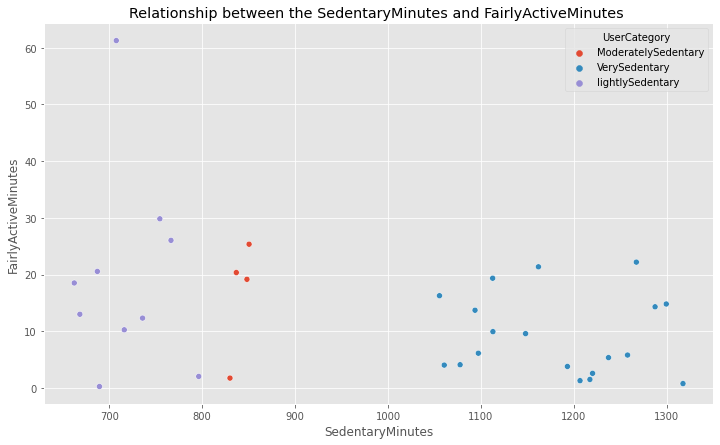

In [40]:
plt.figure(figsize=(12,7))
plt.title("Relationship between the SedentaryMinutes and FairlyActiveMinutes ")
sns.scatterplot(data=avarage_records,x="SedentaryMinutes",y="FairlyActiveMinutes",hue="UserCategory")


here the amount of time spent on sedentary active has no real effect for all type of the users.

<AxesSubplot:title={'center':'Relationship between the SedentaryMinutes and VeryActiveMinutes '}, xlabel='SedentaryMinutes', ylabel='VeryActiveMinutes'>

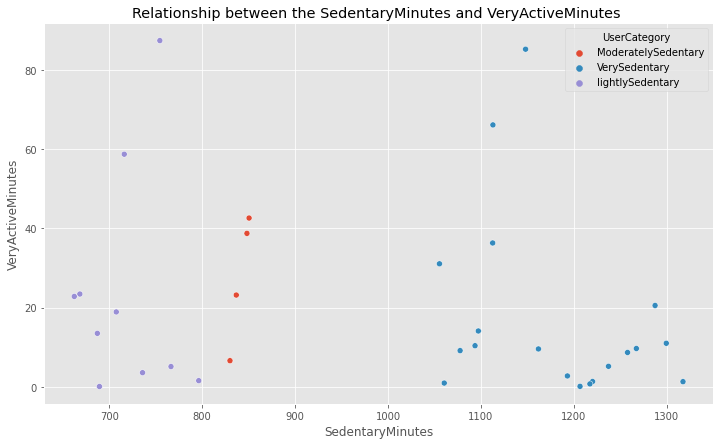

In [46]:
plt.figure(figsize=(12,7))
plt.title("Relationship between the SedentaryMinutes and VeryActiveMinutes ")
sns.scatterplot(data=avarage_records,x="SedentaryMinutes",y="VeryActiveMinutes",hue="UserCategory")


* Very sedentary users, we can see that there are two clusters. The first cluster and also the very large is made up of people of spend less than 20 min in very active activity. We can clearly see that the amount of time spent on sedentary activity negatively impact the time of very active activity. The second cluster is about people who do their best to pratice a lot despite the time that they spend on sedentary activity.
* Fairly sedentary users tend to stay above the 20 min dedicated to very active activity for most of them but less than an hour for all of them.
* There are also two clusters for lightly sedentary users. Although they spend no more than 800 minutes of their day on sedentary activity, when it comes to being very active, most of them stay below and closely above the 20 minutes level.The remaining part perfoms as expected

<AxesSubplot:title={'center':'Relationship between the SedentaryMinutes and TotalSteps '}, xlabel='SedentaryMinutes', ylabel='TotalSteps'>

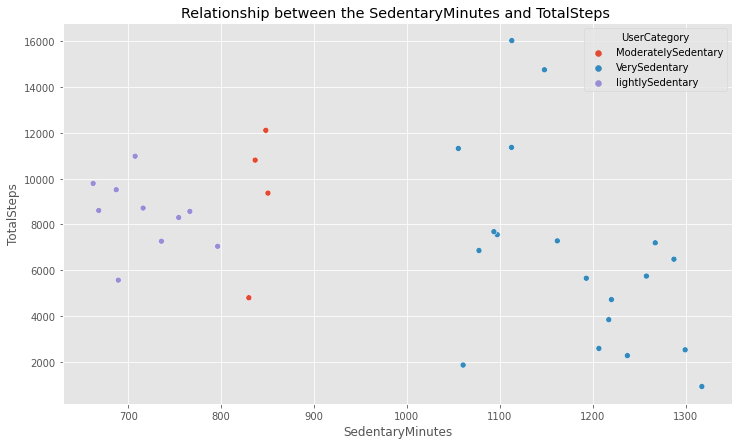

In [42]:
plt.figure(figsize=(12,7))
plt.title("Relationship between the SedentaryMinutes and TotalSteps ")
sns.scatterplot(data=avarage_records,x="SedentaryMinutes",y="TotalSteps",hue="UserCategory")


<AxesSubplot:title={'center':'Relationship between the SedentaryMinutes and TotalDistance '}, xlabel='SedentaryMinutes', ylabel='TotalDistance'>

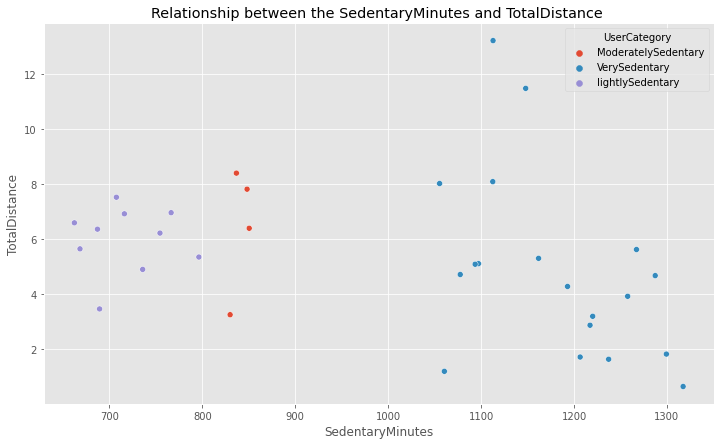

In [43]:

plt.figure(figsize=(12,7))
plt.title("Relationship between the SedentaryMinutes and TotalDistance ")
sns.scatterplot(data=avarage_records,x="SedentaryMinutes",y="TotalDistance",hue="UserCategory")


In [50]:
avarage_records.groupby("UserCategory").mean().sort_values("SedentaryMinutes")

,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
UserCategory,,,,,,,,,,,,,
lightlySedentary,8438.825192,5.986932,5.980287,0.143986,1.220213,0.853438,3.845302,0.000677,23.501444,19.407837,219.455714,718.387066,2301.604859
ModeratelySedentary,9274.750000,6.459194,6.459194,0.000000,1.970565,0.636210,3.753145,0.000000,27.766129,16.653226,200.556452,841.298387,2415.709677
VerySedentary,6665.723498,4.866283,4.843145,0.115476,1.460568,0.384372,2.947908,0.002466,17.058443,9.310350,174.916824,1180.154445,2244.302815


## **Recap and Recommendation**

**Recap:
**

Most of the users tend to have a sedentary lifestyle but among them we identify three clusters based on the amount of time spent on sedentary activities which are: 

1. lightly sedentary users 
They are those who are very close below and above to the recommended amount of time to be spent on sedentary activities. Their average sedentary time is less than 800 minutes or no more than 13 hours a day.

* They are very involved on lightly activities(shopping, cleaning, watering plants...) between 150 to 300 minutes or 2 to 5 hours per day. Concerning the time that they are fairly active and very active, we notice that they behave pretty much the same as very sedentary users. It means that most of them spent less than 20 minutes or very close above, the others outperform.
* They make for most of them between 8 to 10 thousands steps a day and between 6 to 8 miles a day. Only fews of them perform below.

2. Moderately sedentary users

They are those who spend between 800 to 1000 minutes on sedentary activities and tend to be homogeneous in their habits.

* Most of them are very involved on lightly activities(shopping, cleaning, watering plants...) between 200 to 250 minutes or 3 to 4 hours a day. They spend between 20 to 30 minutes on fairly active exercises and 20 to 40 minutes on very active pratices
* They make more than 9 thousand steps and above a day. Their total distance is between 6 to 9 for most of them 

3. Very sedentary users
They are those who spend above 1000 minutes a day on sedentary activies.
* Most of them remain under 20 minutes dedicated to fairly active and very active pratices. Concerning the time spent on lightly activities(shopping, cleaning, watering plants...), we can notice that they make two clusters: those who spent less than 150 minutes and those who spent more than it. Something very important is that, the higest pics in the lightly and very active activities are hit by them.
* Most of them are below the level of 6 thousand steps and 6 km, even if some of them are located above.


**Reccommandations**:

To better meet the user's needs, Bellabeat should:
* align with the differents types customer's needs. Those needs depend a lot on the category that users fall in. We should implement a system that group users into category in other to provide them with an experience that fit the most their needs. For example, lightly sedentary users seems to manage well their time and there will not be very respondent if we set a program to reduce time on sendetary activity while there is a real need for very sedentary people to reduce their time spent on sendetary activity
* implement a notification system that remind users to pratice and so on.
* implement a goal list for users and a rewards system every time that they hit their goal or goes above.

